In [30]:
#install.packages("vegan")
library(vegan)
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# T2 WGS

In [2]:
T2_df_raw = read.csv("T2_16s_clr.csv", row.names = 1)
T2_df = T2_df_raw
T2_df$Category = NULL
T2_df

,X1bbef1070bedf0db507fb6c7b5c28fff,X54843b106b5061dc17ca8f371d357b44,ff3c4e848cb548750221af3deb5389dc,X646c18c31a1f6154773b7b8e64b5c658,X5171cbfbcd1781f0d7e7a7bdb94fb126,X74803c74b50392f83753468b9235c931,X2a2bbfefccc170850029ee0b903a7301,b90340baf132ddf80f4a342d544f1b03,e305ca72b43b91c7a701c947a71ef4b7,ad4f3211c1c7fd39e69c4a22600a9475,⋯,f98d979df04d330a67fb4e5b98ca104d,X689c12390c09b9a29cf4fb872b49edd9,fb4ab06d1dfa87af3bbfa3cdfa43065e,X5b11801bb8adfc9ff5e1a1960d96bc16,X4b28010a343b8f259cd4e8f4c91672c8,c00da10f7b1c5103b343824f9ff5937b,f969f77024f652bdd33ca8aa4d348a91,X7db509e298401edfc42514f0e35a48bd,X31104eba47b7c647b4712e33dfeb786b,e2ef7cb559b4796a5ecbf979b2c6c47c
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
570.T2,7.1107887,-1.1906066,-1.1906066,7.0605738,7.0264658,-1.1906066,-1.1906066,-1.1906066,-1.1906066,6.5869709,⋯,-1.1906066,-1.1906066,-1.1906066,-1.1906066,4.92826196,-1.1906066,4.70258996,-1.1906066,-1.1906066,-1.19060661
571.T2,5.8178609,5.8073345,5.3777718,5.5354007,5.6654539,5.4782423,4.8696525,5.2840863,4.9350353,5.4559366,⋯,-1.4277056,-1.4277056,-1.4277056,-1.4277056,-1.42770565,-1.4277056,-1.42770565,-1.4277056,-1.4277056,-1.42770565
572.T2,3.7813265,4.1398346,4.2374731,4.0099595,4.0458056,4.2079724,4.2490339,3.8084775,3.9952534,3.7721098,⋯,-2.5680999,-2.5680999,2.9186200,-2.5680999,-2.56809986,-2.5680999,-2.56809986,-2.5680999,-2.5680999,-2.56809986
573.T2,4.3013290,4.2519363,3.7326360,3.9878828,4.0256232,4.1117523,3.5460501,3.6590735,3.5460501,3.8011560,⋯,-2.6420983,-2.6420983,-2.6420983,-2.6420983,-2.64209826,-2.6420983,-2.64209826,-2.6420983,-2.6420983,3.01798264
574.T2,3.9541154,3.8379545,3.3102393,3.4675248,3.6878475,3.5551228,2.6495274,3.1333972,2.5663770,3.2449679,⋯,1.8198047,-3.3292026,-3.3292026,2.8853561,-3.32920265,2.3330664,-3.32920265,1.7171505,-3.3292026,0.78038127
575.T2,4.3778979,4.3873172,3.9942746,4.0261679,3.9708543,4.0870563,3.4788086,3.7664906,3.4941935,3.7780515,⋯,-2.6561327,3.2824353,-2.6561327,-2.6561327,-2.65613271,-2.6561327,-2.65613271,2.7461305,-2.6561327,-2.65613271
576.T2,4.1475781,3.8936628,3.7451387,3.8831915,4.0183663,3.8456536,3.4319580,3.6163436,3.3679703,3.7923451,⋯,1.9683720,-3.1829321,-3.1829321,2.5969806,-3.18293207,1.4693808,-3.18293207,-3.1829321,-3.1829321,1.12107412
577.T2,5.3912808,5.4872954,5.4218175,5.9995285,5.2319487,5.7244252,5.0532569,5.1265882,5.1164358,5.1465889,⋯,4.1423863,-1.5784725,-1.5784725,-1.5784725,-1.57847255,-1.5784725,-1.57847255,-1.5784725,-1.5784725,-1.57847255
578.T2,5.1489194,5.1965968,4.8230069,4.8111725,4.6500531,4.6945049,4.4578931,4.5074901,4.5234904,4.6071894,⋯,-2.3115918,-2.3115918,-2.3115918,4.1298598,-2.31159181,2.7782510,-2.31159181,-2.3115918,-2.3115918,-2.31159181


In [3]:
T2_NMDS = metaMDS(T2_df, distance = "euclidean")

'comm' has negative data: 'autotransform', 'noshare' and 'wascores' set to FALSE



Run 0 stress 0.2479925 
Run 1 stress 0.2518666 
Run 2 stress 0.2592579 
Run 3 stress 0.2918151 
Run 4 stress 0.2591003 
Run 5 stress 0.2515215 
Run 6 stress 0.2738196 
Run 7 stress 0.2447807 
... New best solution
... Procrustes: rmse 0.06446495  max resid 0.2482233 
Run 8 stress 0.2770302 
Run 9 stress 0.2487307 
Run 10 stress 0.2447807 
... Procrustes: rmse 9.190805e-06  max resid 2.687836e-05 
... Similar to previous best
Run 11 stress 0.2606642 
Run 12 stress 0.2513037 
Run 13 stress 0.2500419 
Run 14 stress 0.2601483 
Run 15 stress 0.2525124 
Run 16 stress 0.2447807 
... New best solution
... Procrustes: rmse 2.672279e-05  max resid 9.785236e-05 
... Similar to previous best
Run 17 stress 0.2525843 
Run 18 stress 0.2520265 
Run 19 stress 0.390689 
Run 20 stress 0.254287 
*** Solution reached


As a rule of thumb literature has identified the following cut-off values for stress-level:

Higher than 0.2 is poor (risks for false interpretation).
0.1 - 0.2 is fair (some distances can be misleading for interpretation).
0.05 - 0.1 is good (can be confident in inferences from plot).
Less than 0.05 is excellent (this can be rare).


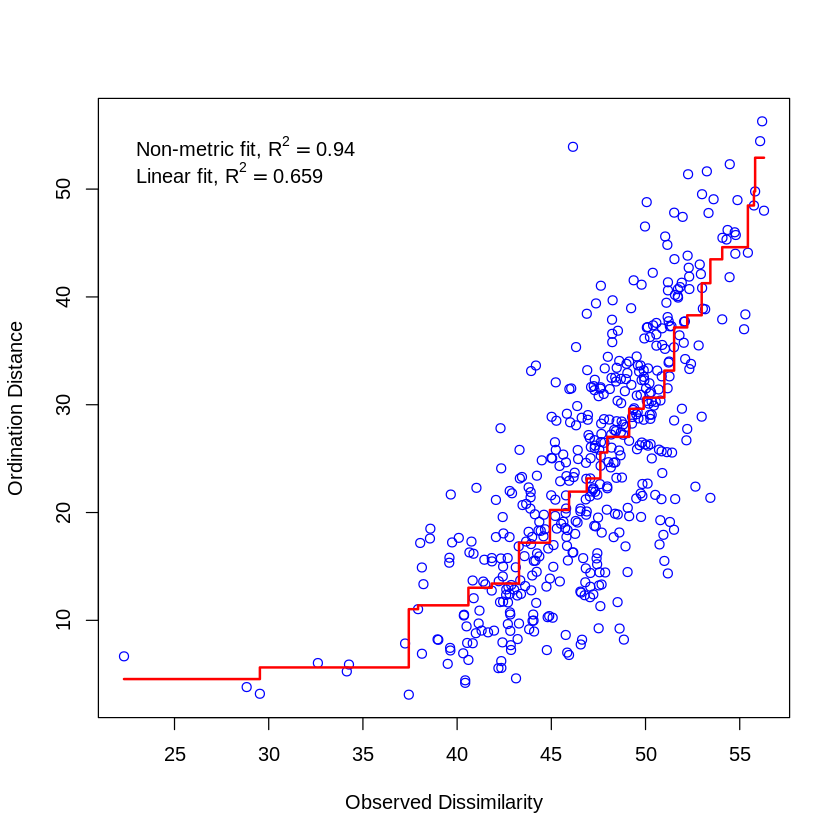

In [4]:
stressplot(T2_NMDS)

species scores not available



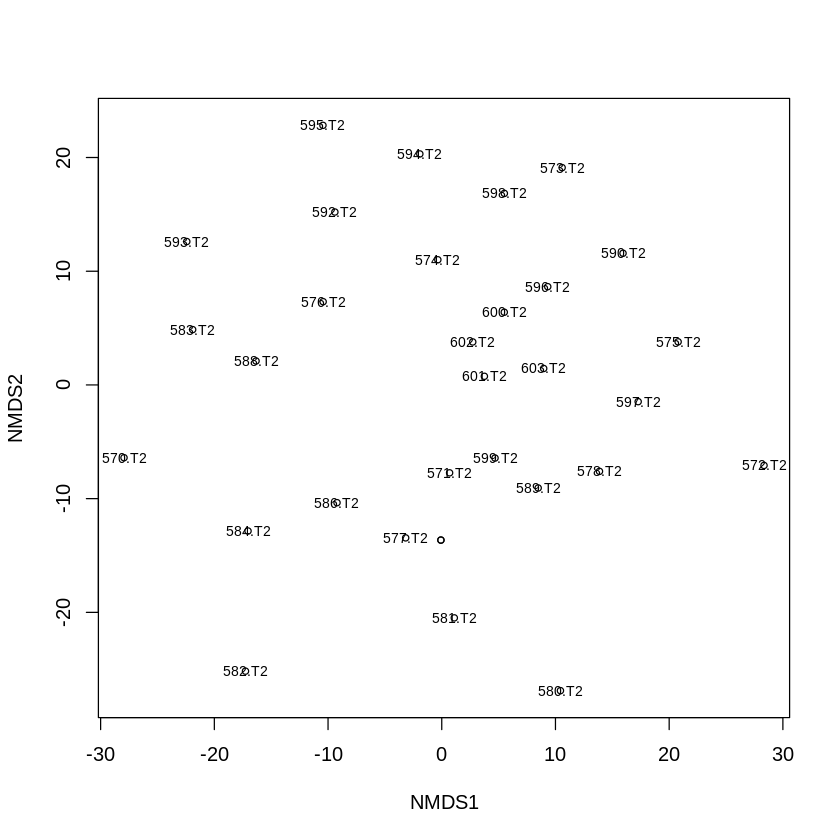

In [5]:
plot(T2_NMDS)
orditorp(T2_NMDS, "sites")

In [6]:
sample_score = as.data.frame(scores(T2_NMDS, display = "sites"))
sample_score <- cbind(sample_score, Category = T2_df_raw$Category)
head(sample_score)

,NMDS1,NMDS2,Category
,<dbl>,<dbl>,<fct>
570.T2,-27.9443098,-6.399661,Placebo
571.T2,0.6883458,-7.730420,Placebo
572.T2,28.3394751,-7.078433,Placebo
573.T2,10.5851689,19.109908,Placebo
574.T2,-0.3461881,11.008472,Placebo
575.T2,20.7857492,3.791198,Placebo


Warning message:
“Use of `sample_score$Category` is discouraged. Use `Category` instead.”


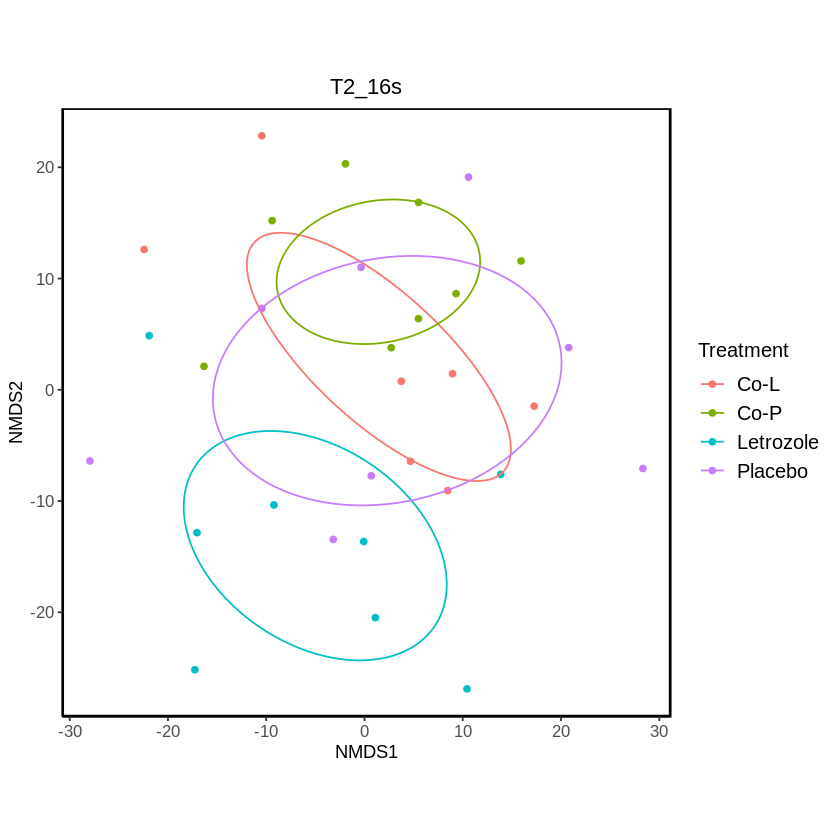

In [7]:
veganCovEllipse <- function (cov, center = c(0, 0), scale = 1, npoints = 100) 
{
  theta <- (0:npoints) * 2 * pi/npoints
  Circle <- cbind(cos(theta), sin(theta))
  t(center + scale * t(Circle %*% chol(cov)))
}

#data for ellipse, in this case using the management factor
sample_score_treatment <- data.frame() #sets up a data frame before running the function.
for(g in levels(sample_score$Category)){
  sample_score_treatment <- rbind(sample_score_treatment, cbind(as.data.frame(with(sample_score [sample_score$Category==g,],
                                                         veganCovEllipse(cov.wt(cbind(NMDS1,NMDS2),wt=rep(1/length(NMDS1),length(NMDS1)))$cov,center=c(mean(NMDS1),mean(NMDS2))))) ,Treatment=g))
}


nmds.plot <- ggplot(sample_score, aes(x=NMDS1, y=NMDS2))+ #sets up the plot
  geom_point(aes(NMDS1, NMDS2, colour = factor(sample_score$Category)))+ #adds site points to plot, colour determined by Treatment
  coord_fixed()+
  theme_classic()+ 
  theme(panel.background = element_rect(fill = NA, colour = "black", size = 1, linetype = "solid"), aspect.ratio = 1)+
  labs(colour = "Treatment") + 
  theme(legend.position = "right", legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.text = element_text(size = 10)) # add legend at right of plot

nmds.plot + ggtitle("T2_16s")+ theme(plot.title = element_text(hjust = 0.5)) + 
geom_path(data = sample_score_treatment, aes(x = NMDS1, y = NMDS2, color = Treatment)) #displays plot

# T5

In [9]:
T5_df_raw = read.csv("T5_16s_clr.csv", row.names = 1)
T5_df = T5_df_raw
T5_df$Category = NULL
T5_df

,X1bbef1070bedf0db507fb6c7b5c28fff,X54843b106b5061dc17ca8f371d357b44,ff3c4e848cb548750221af3deb5389dc,X646c18c31a1f6154773b7b8e64b5c658,X5171cbfbcd1781f0d7e7a7bdb94fb126,X74803c74b50392f83753468b9235c931,X2a2bbfefccc170850029ee0b903a7301,b90340baf132ddf80f4a342d544f1b03,e305ca72b43b91c7a701c947a71ef4b7,ad4f3211c1c7fd39e69c4a22600a9475,⋯,f98d979df04d330a67fb4e5b98ca104d,X689c12390c09b9a29cf4fb872b49edd9,fb4ab06d1dfa87af3bbfa3cdfa43065e,X5b11801bb8adfc9ff5e1a1960d96bc16,X4b28010a343b8f259cd4e8f4c91672c8,c00da10f7b1c5103b343824f9ff5937b,f969f77024f652bdd33ca8aa4d348a91,X7db509e298401edfc42514f0e35a48bd,X31104eba47b7c647b4712e33dfeb786b,e2ef7cb559b4796a5ecbf979b2c6c47c
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
570.T5,4.215878,4.402415,4.441783,4.316619,4.154100,4.126770,4.227333,4.014951,4.061727,3.726330,⋯,-2.900394,2.9631148,-2.9003944,-2.9003944,1.8063949,-2.900394,-2.9003944,-2.900394,-2.9003944,-2.900394
571.T5,3.765617,3.788410,4.146774,3.996226,3.610025,3.970732,3.907757,3.582719,3.879872,3.384353,⋯,1.677493,2.0106371,-3.0967164,-3.0967164,-3.0967164,2.135800,3.4457217,2.978888,-3.0967164,-3.096716
572.T5,4.274053,-3.250373,-3.250373,-3.250373,-3.250373,-3.250373,-3.250373,-3.250373,-3.250373,-3.250373,⋯,-3.250373,-3.2503728,-3.2503728,-3.2503728,-3.2503728,-3.250373,3.2456121,-3.250373,2.0305895,-3.250373
573.T5,3.797589,3.680480,3.159502,3.544348,3.558141,3.438215,3.046173,3.179704,3.011286,3.252025,⋯,-3.022848,-3.0228485,-3.0228485,1.8132127,2.9118250,-3.022848,1.4923050,-3.022848,-3.0228485,2.435264
574.T5,3.334465,3.324395,3.239956,3.448009,3.100745,3.201792,3.342449,3.285174,3.162114,3.085439,⋯,-3.733331,-3.7333307,-3.7333307,-3.7333307,1.9738895,-3.733331,-3.7333307,-3.733331,1.4393474,-3.733331
575.T5,3.542681,3.664955,3.342721,3.191171,3.280956,3.247150,2.847400,2.997880,2.913539,3.026868,⋯,1.566466,2.3618917,-3.5134672,-3.5134672,0.9755973,1.469616,-3.5134672,-3.513467,1.2838987,-3.513467
576.T5,-3.181054,3.232848,-3.181054,-3.181054,-3.181054,3.003662,1.617368,-3.181054,-3.181054,2.451594,⋯,-3.181054,-3.1810543,-3.1810543,-3.1810543,-3.1810543,-3.181054,-3.1810543,-3.181054,-3.1810543,2.653460
577.T5,-3.101532,-3.101532,-3.101532,3.707702,-3.101532,-3.101532,-3.101532,-3.101532,-3.101532,-3.101532,⋯,2.639070,-3.1015320,1.7036098,-3.1015320,-3.1015320,-3.101532,-3.1015320,-3.101532,-3.1015320,-3.101532
578.T5,3.835678,3.975701,3.639229,4.029951,3.784279,3.460802,3.250693,3.434212,3.372464,3.120240,⋯,-3.360680,-3.3606796,-3.3606796,1.4297339,-3.3606796,-3.360680,-3.3606796,-3.360680,-3.3606796,-3.360680


In [10]:
T5_NMDS = metaMDS(T5_df, distance = "euclidean")

'comm' has negative data: 'autotransform', 'noshare' and 'wascores' set to FALSE



Run 0 stress 0.2159185 
Run 1 stress 0.2260946 
Run 2 stress 0.2375964 
Run 3 stress 0.2266242 
Run 4 stress 0.2227391 
Run 5 stress 0.2356927 
Run 6 stress 0.224556 
Run 7 stress 0.2221637 
Run 8 stress 0.2211552 
Run 9 stress 0.2188358 
Run 10 stress 0.2281105 
Run 11 stress 0.2221637 
Run 12 stress 0.2259325 
Run 13 stress 0.2341904 
Run 14 stress 0.2158563 
... New best solution
... Procrustes: rmse 0.02150342  max resid 0.09726138 
Run 15 stress 0.2224988 
Run 16 stress 0.2264475 
Run 17 stress 0.2287844 
Run 18 stress 0.2287845 
Run 19 stress 0.2277803 
Run 20 stress 0.2779758 
*** No convergence -- monoMDS stopping criteria:
     1: no. of iterations >= maxit
    19: stress ratio > sratmax


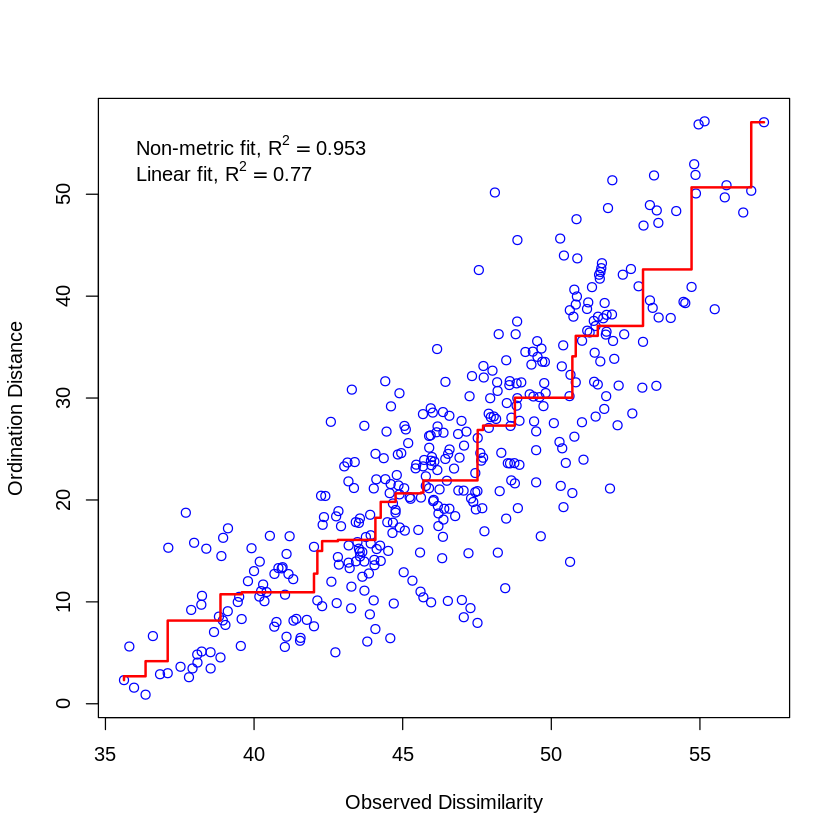

In [11]:
stressplot(T5_NMDS)

species scores not available



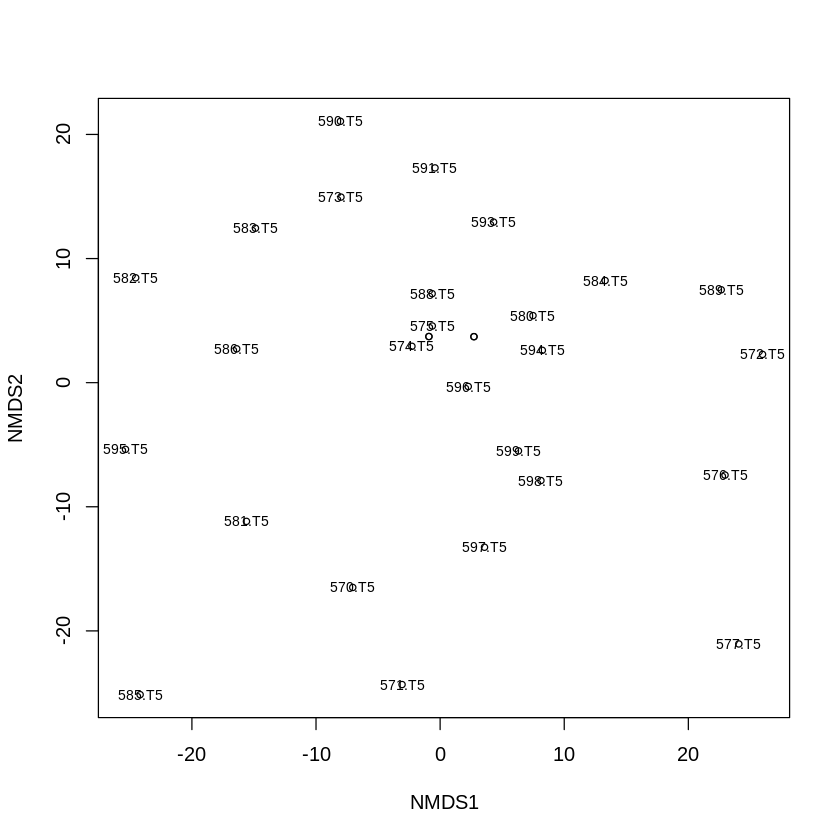

In [12]:
plot(T5_NMDS)
orditorp(T5_NMDS, "sites")

In [13]:
sample_score = as.data.frame(scores(T5_NMDS, display = "sites"))
sample_score <- cbind(sample_score, Treatment = T5_df_raw$Category)
head(sample_score)

,NMDS1,NMDS2,Treatment
,<dbl>,<dbl>,<fct>
570.T5,-7.0416709,-16.501201,Placebo
571.T5,-3.0693121,-24.324633,Placebo
572.T5,25.9763344,2.277115,Placebo
573.T5,-7.9934082,14.952207,Placebo
574.T5,-2.2740221,2.930388,Placebo
575.T5,-0.6319257,4.567223,Placebo


Warning message:
“Use of `sample_score$Treatment` is discouraged. Use `Treatment` instead.”


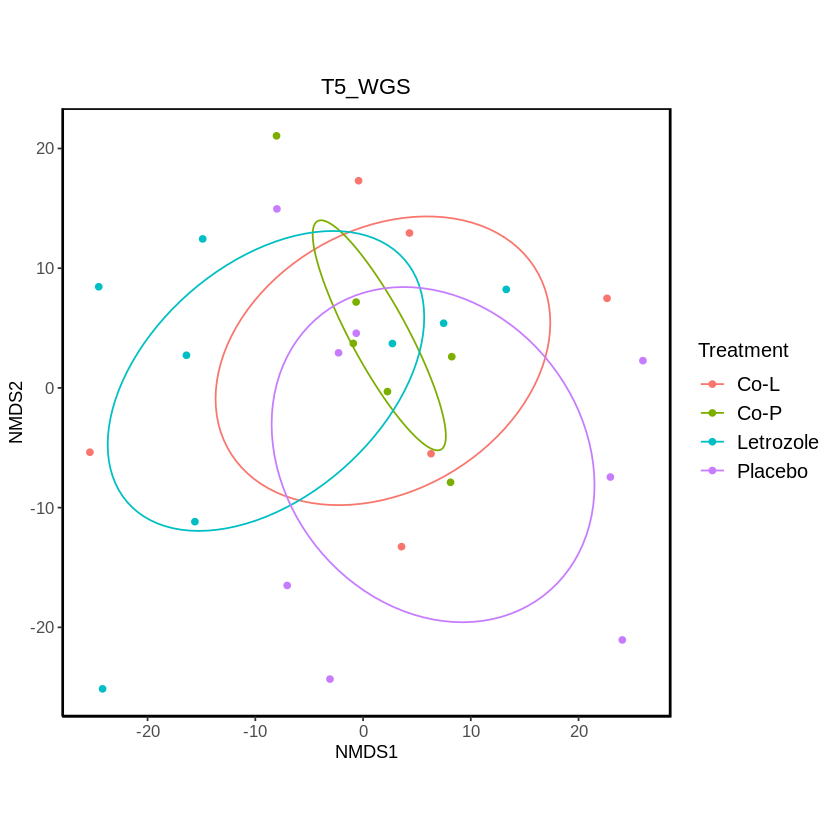

In [14]:
veganCovEllipse <- function (cov, center = c(0, 0), scale = 1, npoints = 100) 
{
  theta <- (0:npoints) * 2 * pi/npoints
  Circle <- cbind(cos(theta), sin(theta))
  t(center + scale * t(Circle %*% chol(cov)))
}

#data for ellipse, in this case using the management factor
sample_score_treatment <- data.frame() #sets up a data frame before running the function.
for(g in levels(sample_score$Treatment)){
  sample_score_treatment <- rbind(sample_score_treatment, cbind(as.data.frame(with(sample_score [sample_score$Treatment==g,],
                                                         veganCovEllipse(cov.wt(cbind(NMDS1,NMDS2),wt=rep(1/length(NMDS1),length(NMDS1)))$cov,center=c(mean(NMDS1),mean(NMDS2))))) ,Treatment=g))
}


nmds.plot <- ggplot(sample_score, aes(x=NMDS1, y=NMDS2))+ #sets up the plot
  geom_point(aes(NMDS1, NMDS2, colour = factor(sample_score$Treatment)))+ #adds site points to plot, colour determined by Treatment
  coord_fixed()+
  theme_classic()+ 
  theme(panel.background = element_rect(fill = NA, colour = "black", size = 1, linetype = "solid"), aspect.ratio = 1)+
  labs(colour = "Treatment") + 
  theme(legend.position = "right", legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.text = element_text(size = 10)) # add legend at right of plot

nmds.plot + ggtitle("T5_WGS")+ theme(plot.title = element_text(hjust = 0.5)) + 
geom_path(data = sample_score_treatment, aes(x = NMDS1, y = NMDS2, color = Treatment))#displays plot

# Permanova

# T2

In [39]:
T2_WGS = read.csv("T2_16s_clr.csv") %>% column_to_rownames('OTUID')
T2_WGS$Category = NULL
T_mapping = read.csv("mapping_file_Treat.tsv",sep='\t')
T2_mapping = subset(T_mapping,Week == '2')
T2_WGS.dist <- vegdist(T2_WGS, method="euclidean")
T2_WGS.div <- adonis2(T2_WGS ~ Category, data = T2_mapping, permutations = 999, method="euclidean")
T2_WGS.div

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,3,4086.454,0.1225239,1.25669,0.024
Residual,27,29265.839,0.8774761,NA,NA
Total,30,33352.293,1.0000000,NA,NA


# T5

In [43]:
T5_WGS = read.csv("T5_16s_clr.csv") %>% column_to_rownames('OTUID')
T5_WGS$Category = NULL
T_mapping = read.csv("mapping_file_Treat.tsv",sep='\t')
T5_mapping = subset(T_mapping,Week == '5')
T5_WGS.dist <- vegdist(T5_WGS, method="euclidean")
T5_WGS.div <- adonis2(T5_WGS ~ Category, data = T5_mapping, permutations = 999, method="euclidean")
T5_WGS.div

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Category,3,3296.269,0.1122627,1.011675,0.43
Residual,24,26065.834,0.8877373,NA,NA
Total,27,29362.103,1.0000000,NA,NA
